In [1]:
!nvidia-smi


Mon Sep 18 13:07:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install Dependencies

In [2]:
!pip install PyPDF2
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.9 MB/s eta 0:00:00


Import Dependencies

In [3]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Unziping reume data

In [5]:
!unzip resume_data.zip

Archive:  resume_data.zip
   creating: data/ACCOUNTANT/
  inflating: data/ACCOUNTANT/10554236.pdf  
  inflating: data/ACCOUNTANT/10674770.pdf  
  inflating: data/ACCOUNTANT/11163645.pdf  
  inflating: data/ACCOUNTANT/11759079.pdf  
  inflating: data/ACCOUNTANT/12065211.pdf  
  inflating: data/ACCOUNTANT/12202337.pdf  
  inflating: data/ACCOUNTANT/12338274.pdf  
  inflating: data/ACCOUNTANT/12442909.pdf  
  inflating: data/ACCOUNTANT/12780508.pdf  
  inflating: data/ACCOUNTANT/12802330.pdf  
  inflating: data/ACCOUNTANT/13072019.pdf  
  inflating: data/ACCOUNTANT/13130984.pdf  
  inflating: data/ACCOUNTANT/13294301.pdf  
  inflating: data/ACCOUNTANT/13491889.pdf  
  inflating: data/ACCOUNTANT/13701259.pdf  
  inflating: data/ACCOUNTANT/14055988.pdf  
  inflating: data/ACCOUNTANT/14126433.pdf  
  inflating: data/ACCOUNTANT/14224370.pdf  
  inflating: data/ACCOUNTANT/14449423.pdf  
  inflating: data/ACCOUNTANT/14470533.pdf  
  inflating: data/ACCOUNTANT/14491649.pdf  
  inflating: data/AC

Function to extract text from pdf

In [6]:
def extract_text_from_pdf(file_path):
  pdf_file = open(file_path, 'rb')
  pdf_reader = PyPDF2.PdfReader(pdf_file)
  text = ""
  for page in range(len(pdf_reader.pages)):
      page_obj = pdf_reader.pages[page]
      text += page_obj.extract_text()
  pdf_file.close()
  return text

Function to preprocess text



In [7]:
def preprocess_text(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text.lower())
  filtered_tokens = [word for word in word_tokens if word.isalpha() and word not in stop_words]
  return filtered_tokens

Function to calculate similarity between job_description and resume

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(resume_text, jd_text):
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform([resume_text, jd_text])
  similarity_score = cosine_similarity(vectors)[0][1]
  return similarity_score

Word Cloud

In [9]:
!pip install wordcloud
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from wordcloud import WordCloud  # Import WordCloud class from the wordcloud library

def wordcloud(text):
    word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

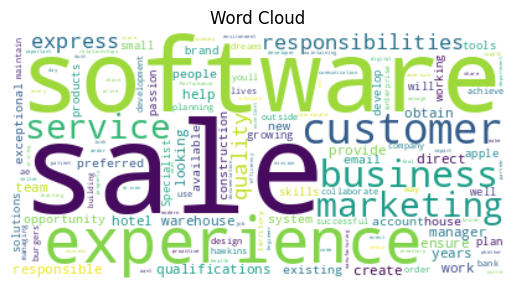

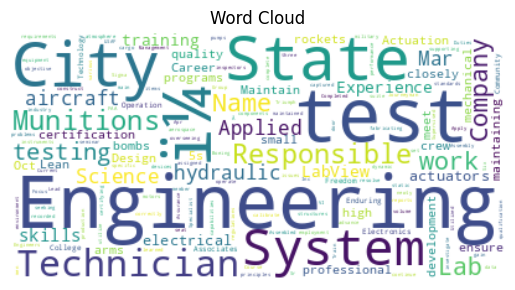

The similarity score between the resume and job description is:  0.08979948111872423


In [11]:
from sqlalchemy.sql.expression import extract
def main():
  resume_file_path = "/content/10030015.pdf"
  jd_file_path = "/content/Job_Description.pdf"

  if resume_file_path.endswith('.pdf'):
    resume_text = extract_text_from_pdf(resume_file_path)
    jd_text = extract_text_from_pdf(jd_file_path)
  else:
    print("Unsupported file format.")
    return

  preprocessed_resume_text = preprocess_text(resume_text)
  preprocessed_jd_text = preprocess_text(jd_text)

  wordcloud(jd_text)
  wordcloud(resume_text)

  similarity_score = calculate_similarity(' '.join(preprocessed_resume_text), ' '.join(preprocessed_jd_text))
  print("The similarity score between the resume and job description is: ", similarity_score)

if __name__ == "__main__":
  main()

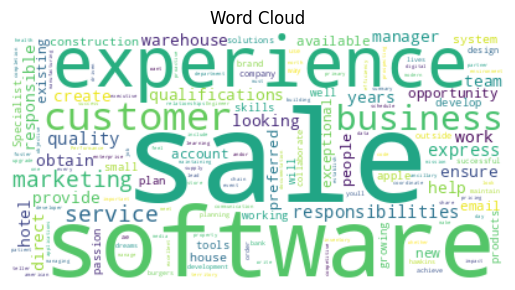

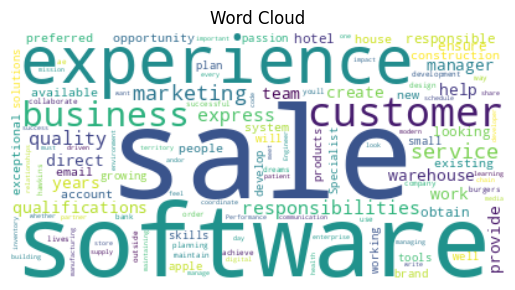

File: Job_Description.pdf, Similarity Score: 1.0000000000000007


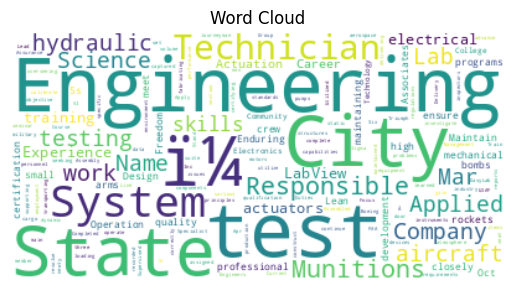

In [12]:
import os
from sqlalchemy.sql.expression import extract

def main():
    jd_file_path = "/content/Job_Description.pdf"


    resume_folder_path = "/content"

    if not os.path.exists(resume_folder_path):
        print(f"Folder '{resume_folder_path}' does not exist.")
        return

    jd_text = extract_text_from_pdf(jd_file_path)
    preprocessed_jd_text = preprocess_text(jd_text)
    wordcloud(jd_text)


    threshold = 0.3

    for resume_filename in os.listdir(resume_folder_path):
        if resume_filename.endswith('.pdf'):
            resume_file_path = os.path.join(resume_folder_path, resume_filename)
            resume_text = extract_text_from_pdf(resume_file_path)
            preprocessed_resume_text = preprocess_text(resume_text)
            wordcloud(resume_text)

            similarity_score = calculate_similarity(' '.join(preprocessed_resume_text), ' '.join(preprocessed_jd_text))

            if similarity_score >= threshold:
                print(f"File: {resume_filename}, Similarity Score: {similarity_score}")

if __name__ == "__main__":
    main()